In [111]:
# Adding the part of code mentioned in the pdf below

#Uses pillow (you can also use another imaging library if you want)
from PIL import Image, ImageOps, ImageFont, ImageDraw

#Load the font and set the font size to 42
font = ImageFont.truetype('habbakuk/Habbakuk.ttf', 42)

#Character mapping for each of the 27 tokens
char_map = {'Alef' : ')', 
            'Ayin' : '(', 
            'Bet' : 'b', 
            'Dalet' : 'd', 
            'Gimel' : 'g', 
            'He' : 'x', 
            'Het' : 'h', 
            'Kaf' : 'k', 
            'Kaf-final' : '\\', 
            'Lamed' : 'l', 
            'Mem' : '{', 
            'Mem-medial' : 'm', 
            'Nun-final' : '}', 
            'Nun-medial' : 'n', 
            'Pe' : 'p', 
            'Pe-final' : 'v', 
            'Qof' : 'q', 
            'Resh' : 'r', 
            'Samekh' : 's', 
            'Shin' : '$', 
            'Taw' : 't', 
            'Tet' : '+', 
            'Tsadi-final' : 'j', 
            'Tsadi-medial' : 'c', 
            'Waw' : 'w', 
            'Yod' : 'y', 
            'Zayin' : 'z'}

#Returns a grayscale image based on specified label of img_size
def create_image(label, img_size):
    if (label not in char_map):
        raise KeyError('Unknown label!')

    #Create blank image and create a draw interface
    img = Image.new('L', img_size, 255)    
    draw = ImageDraw.Draw(img)

    #Get size of the font and draw the token in the center of the blank image
    left, top, right, bottom = font.getbbox(char_map[label])
    w = right - left
    h = bottom - top       
    draw.text(((img_size[0]-w)/2, (img_size[1]-h)/2), char_map[label], 0, font)

    return img

#Create a 50x50 image of the Alef token and save it to disk
#To get the raw data cast it to a numpy array
img = create_image('Alef', (50, 50))
img.save('example_alef.png')

<h1>Preprocess and segment</h1>

In [124]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks
import PIL.ImageOps


example_text_image_pillow = Image.open("sample-test-2025/124-Fg004.pbm")
example_text_image_cv = cv2.imread("sample-test-2025/124-Fg004.pbm")
height, width, channels = example_text_image_cv.shape

def horizontal_projection(image):
    projection = np.sum(image, axis=1)
    smoothed_projection = gaussian_filter1d(projection, sigma=1)
    inverted_projection = -smoothed_projection
    peaks, _ = find_peaks(inverted_projection, prominence=50) 

    line_segments = []
    line_length = 30

    for peak in peaks:
        top =  max(0, peak -line_length)
        bottom = min(len(projection), peak + line_length)
        line_segments.append((top, bottom))
    return line_segments


line_segments = horizontal_projection(example_text_image_pillow)


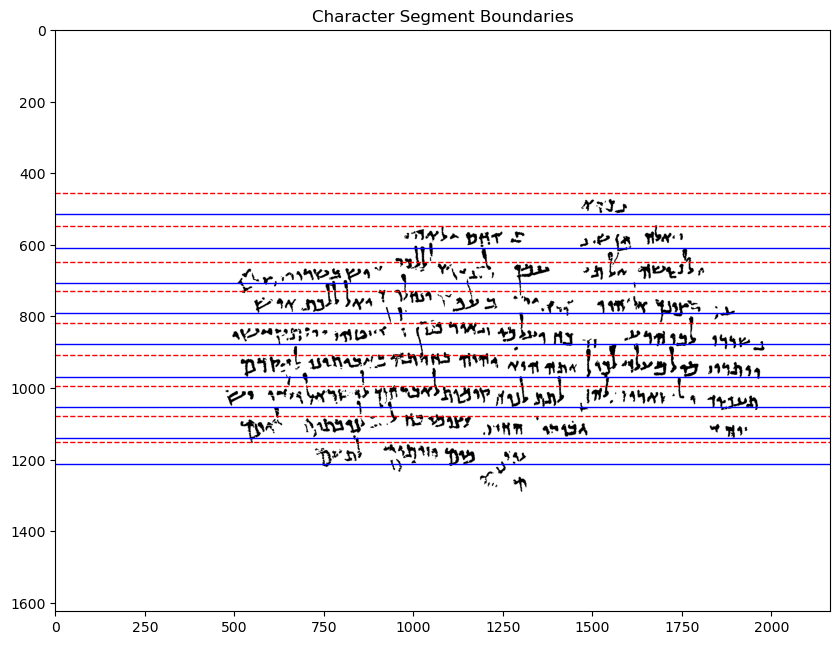

In [128]:
#plot
# Show original image with horizontal lines at character segment boundaries
plt.figure(figsize=(10, 8))
plt.imshow(example_text_image_pillow, cmap='gray')
for (top, bottom) in line_segments:
    plt.axhline(top, color='red', linestyle='--', linewidth=1)
    plt.axhline(bottom, color='blue', linestyle='-', linewidth=1)
plt.title("Character Segment Boundaries")
plt.show()

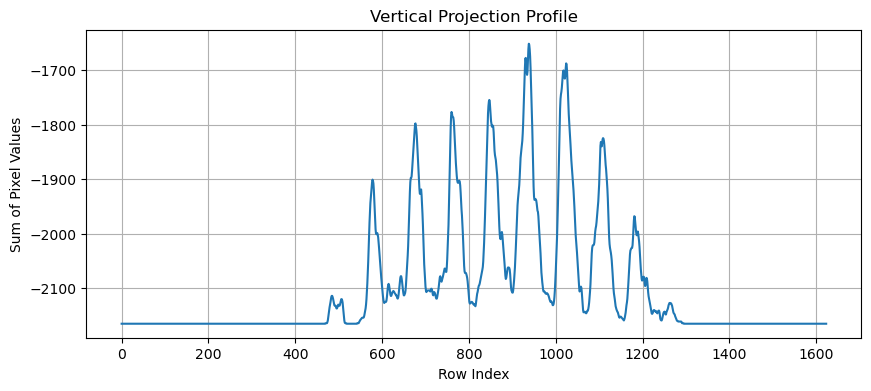

In [126]:
plt.figure(figsize=(10, 4))
plt.plot(inverted_projection)
plt.title("Vertical Projection Profile")
plt.xlabel("Row Index")
plt.ylabel("Sum of Pixel Values")
plt.grid(True)
plt.show()